<a href="https://colab.research.google.com/github/5harad/API-201-2023/blob/main/hw/hw5/hw5-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-201 PROBLEM SET #5
**Due on Thursday, October 5, at 8:00 a.m.**

**I - INSTRUCTIONS**  
To successfully complete this problem set, please follow these steps:

1. **Create a copy of this notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!*** We recommend completing this problem set in Google Chrome.
2. **Insert all your answers into your copy of the document.**
    1. Please include every portion of your submission in this document unless a separate electronic file is explicitly requested.
    3. All numerical calculations should be done in the notebook itself, using R code. If you have to do calculations by hand, include a picture of your handwritten work.
    2. To add an image of handwritten work, screenshots, or anything else, add a new text cell and click the small image icon in the menubar above the cell. After inserting an image, press the `esc` key to show the image. If you have trouble with this method, upload your image to [Freeimage.host](https://freeimage.host), copy a Markdown link, and paste it in a text cell.
3. **Once your document is complete, please save and submit the notebook on Canvas as a PDF.**
    1. Click `View > Expand sections` in the menubar to make sure all work is visible (if it is greyed out then it is already visible).
    1. Click `Runtime > Run all` in the menubar to make sure all of your code is executed.
    1. Click `File > Print` in the menubar and choose the `Save as PDF` option in Chrome to export your notebook as a PDF.
    1. Check to make sure answers do not get cut off - when you go to print the PDF we recommend clicking on `More settings` and setting `Margins` to `None`.
    1. Submit your file on Canvas.


**II - IDENTIFICATION**
1. **Your Full Name:** `     `  

2. **Group Members (classmates with whom you worked on this problem set):**  
    1. `     `
    2. `     `
    3. `     `
    4. `     `
    
3. **Compliance with HKS Academic Code**  
We abide by the Harvard Kennedy School Academic code for all aspects of the course. In terms of problem sets, unless explicitly written otherwise, the norms are the following: You are free (and encouraged) to discuss problem sets with your classmates. However, you must hand in your own unique written work and code in all cases. Any copy/paste of another’s work is plagiarism. In other words, you may work with your classmate(s), sitting side-by-side (physically or remotely!) and going through the problem set question by question, but you must each type your own answers and your own code. For more details, please see syllabus.

    **I certify that my work in this problem set complies with the HKS Academic Code**
    - [ ] Yes
    - [ ] No

---

# LEARNING OBJECTIVES

1. The basic principals behind causal inference
2. Introduction to probability


-----

# PART 0: MID-COURSE FEEDBACK

> Now that we have settled into a rhythm in API-201, we would like to get a sense from you about how the course is going from your perspective.  Please complete this brief survey to give us your feedback. Your answers are anonymous and we would like to encourage you to be both candid and constructive. Our goal is to be able to use your feedback to improve the course. We estimate it will take you about 10 minutes to fill it in. Thank you in advance for your feedback!


**[Click here to complete our feedback survey.](https://harvard.az1.qualtrics.com/jfe/form/SV_bqgtMD3FQUc8NDw)**

**Completed the survey**
- [ ] Yes
- [ ] No

-----

# GETTING STARTED
Run the cell below to load the tidyverse library that we'll use throughout the assignment. We'll also install and load the `Rlab` package that is useful for running simulations.

In [ ]:
library(tidyverse)

install.packages('Rlab')
library(Rlab)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rlab 4.0 attached.



Attaching package: ‘Rlab’


The following object is masked from ‘package:dplyr’:

    count


The following object is masked from ‘package:tibble’:

    view


The following objects are masked from ‘package:stats’:

    dexp, dgamma, dweibull, pexp, pgamma, pweibull, qexp, qgamma,
    qweibull, rexp, rgamma, rweibull


The following object is masked from ‘package:datas

--------

# PART 1: CORRELATION VS CAUSATION

The pre-loaded `swiss` dataset in R provides fertility and socio-economic indicators for 47 French-speaking provinces of Switzerland in 1888. For this exercise, we will focus on the following variables:

 - Fertility: Standardized fertility rate in each province (births per 1000 women of child bearing age).
 - Education: Average years of education in each province.
 - Agriculture: Percentage of males engaged in agriculture.
 - Catholic: Percentage of residents in the province who are Catholic.

In [ ]:
# Run this to summarize the dataset
summary(swiss)


   Fertility      Agriculture     Examination      Education    
 Min.   :35.00   Min.   : 1.20   Min.   : 3.00   Min.   : 1.00  
 1st Qu.:64.70   1st Qu.:35.90   1st Qu.:12.00   1st Qu.: 6.00  
 Median :70.40   Median :54.10   Median :16.00   Median : 8.00  
 Mean   :70.14   Mean   :50.66   Mean   :16.49   Mean   :10.98  
 3rd Qu.:78.45   3rd Qu.:67.65   3rd Qu.:22.00   3rd Qu.:12.00  
 Max.   :92.50   Max.   :89.70   Max.   :37.00   Max.   :53.00  
    Catholic       Infant.Mortality
 Min.   :  2.150   Min.   :10.80   
 1st Qu.:  5.195   1st Qu.:18.15   
 Median : 15.140   Median :20.00   
 Mean   : 41.144   Mean   :19.94   
 3rd Qu.: 93.125   3rd Qu.:21.70   
 Max.   :100.000   Max.   :26.60   

**a. Hypothesize the relationship between the socio-economic indicators (`Educaction`, `Agriculture`, and `Catholic`) and fertility rates. Why might understanding these relationships be important for policy making?**

Your answer here!

#### START

 - Education: Higher education levels, especially among women, might be linked to lower fertility rates as more educated women might delay having childbirth children.
 - Agriculture: Regions with a higher percentage of males engaged in agriculture might have higher fertility rates since larger families can be beneficial in agricultural settings for labor.
 - Catholic: Religion can influence attitudes towards contraception and family size. For instance, provinces with a higher percentage of Catholics might have higher fertility rates if the religion's teachings discourage contraception.
    
Understanding the relationship between the socio-economic indicators and fertility rates can guide policy-making in areas like education, healthcare, and labor. For example, if higher education levels are associated with lower fertility rates, policies promoting women's education might indirectly influence family planning. We will focus on these variables.

#### END

**b. Generate a histogram of the `Education` distribution. Label it appropriately.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


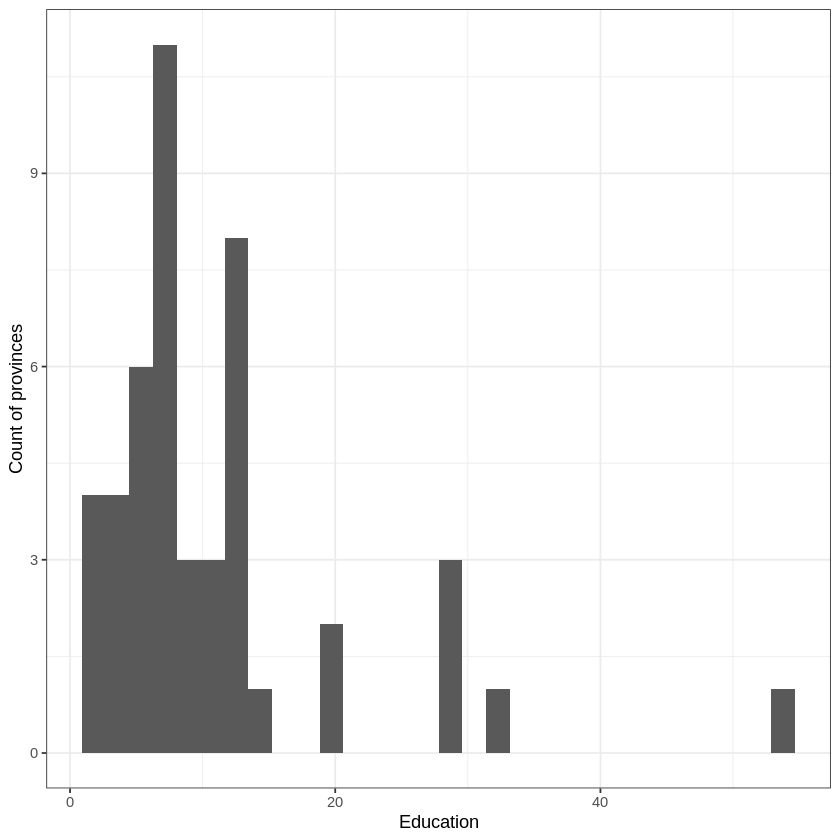

In [ ]:
# Your answer here!

# START
ggplot(swiss, aes(x=Education)) +
    geom_histogram() +
    scale_x_continuous(name = "Education") +
    scale_y_continuous(name = "Count of provinces") +
    theme_bw()
# END

**c. Describe the overall distribution across the provinces. Consider the point with the largest value —— would you call that point an outlier? Do you think it is real or an erroneous data point?**

Your answer here!

#### START

It is right skewed (mean is greater than median). In terms of outliers, it is unlikely that any province had people with 53 years of education on averge. Therefore that data point is likely a data error.

#### END

**d. Drop the potential outlier going forward. Create a scatterplot comparing `Fertility` and `Education`.**

To help visualize the association between `Education` and `Fertility`, you can add `geom_smooth(method='lm', se=FALSE)` to your plot. This will add a _regression line_, a topic we'll talk more about next semester.

Hint: create a new dataset with the potential outlier dropped, and then use this new dataset going forward.

`geom_smooth()` using formula = 'y ~ x'


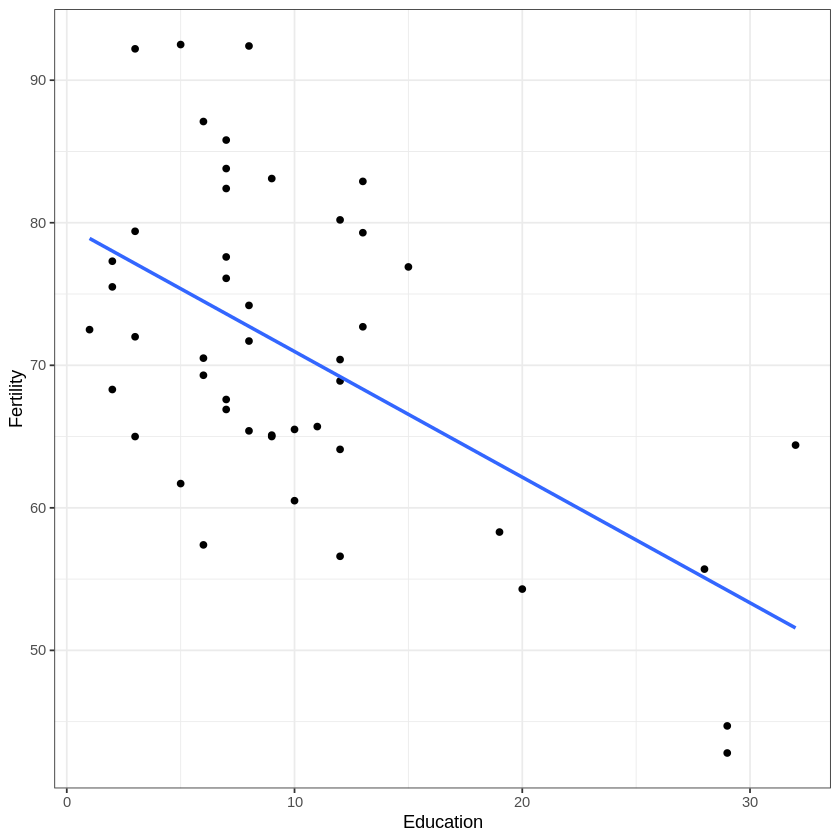

In [ ]:
# Your answer here!

# START
swiss_updated <- swiss %>%
  filter(Education < 40)

ggplot(swiss_updated, aes(Education, Fertility)) +
  geom_point() +
  scale_x_continuous(name = "Education") +
  scale_y_continuous(name = "Fertility") +
  geom_smooth(method='lm', se=FALSE) +
  theme_bw()
# END

**e. What pattern do you observe? Is the pattern consistent with education _causing_ fertility to be reduced? Suggest an alternative explanation for the pattern (i.e., other than education causing lower fertility).**

Your answer here!

#### START

There is a negative correlation between education and fertility. Based on this pattern, it may be that education causally decreases fertility. But there might also be other explanations for the pattern. For example, it could be that fertility decreases education, since having children might mean that parents are less able to continue with their schooling.

#### END

**f. When thinking about whether education _causally_ reduces fertility rates, it's important to consider whether there might be confounding variables. Considering the `swiss` dataset, do you think `Agriculture` or `Catholic` might be confounding variables? Why?**

Your answer here!

#### START

Confounders are variables that may influence both of the variables of interest (e.g., education and fertility), creating the illusion of a causal connection between the two. In the context of the `swiss` dataset, `Agriculture` and `Catholic` could be confounders:

 - `Agriculture` might lead both to lower `Education` (since people may be busier with work) and higher `Fertility` (perhaps because larger families can help with agricultural labor).
 - `Catholic` could also confound the relationship if religious beliefs about contraception lead to an increase in family size, and also lead to lower levels of education, perhaps because of decreased interest in secular higher education.

#### END

One way to disentangle any effect of agriculture on the relationship between education and fertility is to separately plot education vs. fertility for low education and high education regions. In this way, we are _controlling_ for any effect of agriculture by only comparies counties with similar agriculture levels. This is the same idea behind using regression models to identify causal effects by adjusting for potential confounding variables, a topic we'll return to next semester.

**g. Recreate your scatter plot above, but facet the points based on whether `Agriculture` is above or below its median.**

Hint: first create a binary column in your dataset that indicates whether a county has agricultural level above or below the median across counties.

`geom_smooth()` using formula = 'y ~ x'


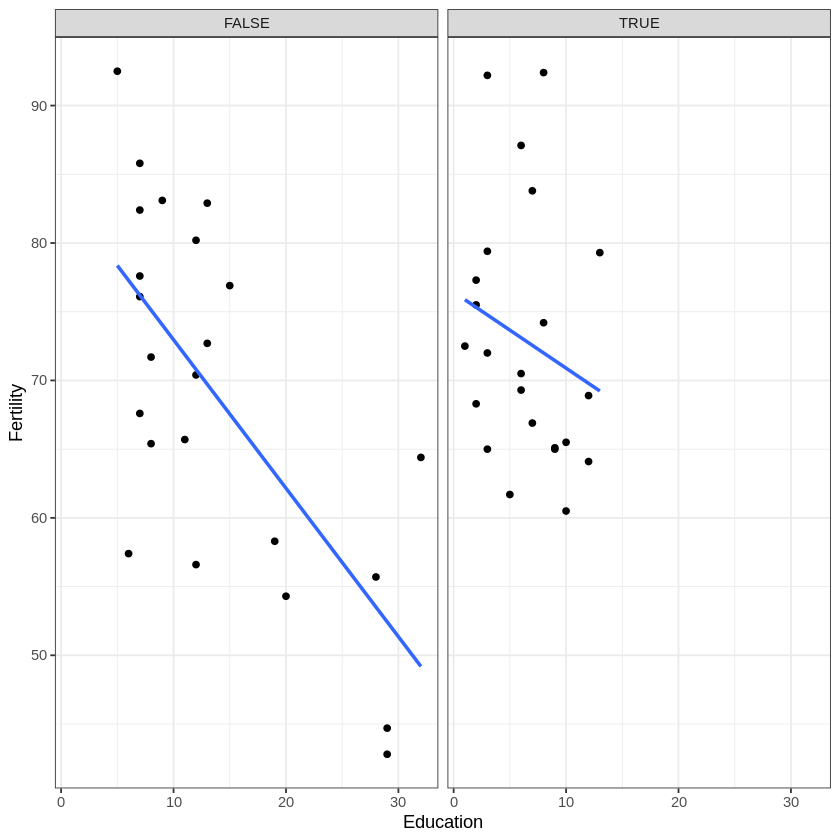

In [ ]:
# Your answer here!

# START
swiss_updated <- swiss_updated %>%
  mutate(high_agriculture = Agriculture > median(Agriculture))

ggplot(swiss_updated, aes(Education, Fertility)) +
  geom_point() +
  scale_x_continuous(name = "Education") +
  scale_y_continuous(name = "Fertility") +
  scale_color_discrete(name="High agriculture") +
  geom_smooth(method='lm', se=FALSE) +
  facet_grid(~ high_agriculture) +
  theme_bw()
# END

**h. What patterns do you observe?**

Your answer here!

#### START

In both high agriculture and low agriculture counties, there is a negative relationship between education and fertility: counties with higher education levels have lower fertility rates, even after adjusting for agriculture.

This plot provides more evidence of a causal connection between the education and fertility, but there could still be other, non-causal explanations (e.g., religion could be a confounding variable), and it is still not clear what direction the causation might go in (i.e., lower fertility could cause higher education).

#### END

# PART 2: CAUSAL INFERENCE WITH OBSERVATIONAL DATA

Describe a plausible strategy for estimating a causal effect of your choice related to public policy using a _natural experiment_. In particular, your strategy should only require observational data (i.e., without using a randomized experiment), and we ask that you do not suggest a simple pre-post design. (Pre-post designs are useful, but, for purposes of this exercise, we would like you to think beyond that approach.)

You do not need to carry out any data analysis, but the strategy you describe should be realistic. That is, it should be possible in theory to carry out your proposal.

What are the assumptions your approach relies on? What are the advantages and limitations of your proposal?

We expect that you clearly specify: (1) what the causal effect you'd like to measure is; (2) what the observed data are; and (3) why that data plausibly allows you to measure the causal effect. Most importantly, it should be clear what the treatment is and how/why assignment to treatment can be considered pseudo-random in the observational data that you describe.


**Describe your proposed natural experiment below.**

Your answer here!

### START

Many possible answers!

### END

# PART 3: HOW TO TALK ABOUT FLOODS

Recent hurricanes (including Hurricanes Dorian, Harvey, Irma, Maria, Florence, and Ida) have caused flooding, damage, and substantial loss of life in various areas of the United States and the Caribbean. This question focuses on one effect of hurricanes: flooding.

Experts and commentators often use terms such as “50-year flood,” “100-year flood,” and “500-year flood” to describe the likely frequency of flooding due to storms such as the recent hurricanes.  According to experts such as the United States Geological Survey, a “100-year flood” is a flood that has a 1 percent chance of happening in each year - similarly, a 50-year flood is a flood that has a 2 percent chance of happening each year (Note that as a simplifying assumption, we are assuming that we can't have more than one flood per year).

The general public does not often interpret the terms in this way - specifically, it often does not understand that a 100-year flood can happen more than once per 100 years.

As background for this question, please [read this op-ed](https://drive.google.com/file/d/131Ti68YnkWXpOdZa15lYeSb45k-8wQFA/view?usp=sharing).

### 1. Talking about floods

**a. Explain how it's possible to have a 100-year flood more than once per 100 years.**

Your answer here!

#### START
In any given year, there's a 1% chance of a flood, but there's random fluctuations due to chance. So even if there's one every 100 years in expectation, it's possible to have zero floods or many floods in any given time period.
#### END

Brian Bledsoe, the author of the linked essay and a professor at the University of Georgia, writes:

> "\[M\]ost people are still surprised, if not astonished, to learn that the 100-year flood at a given location has more than a 1 in 4 chance of occurring within the term of a 30-year mortgage. For most of us, this 26 percent chance our home will be flooded before we have a chance to pay it off is troubling if not unacceptable."

**b. Show how Professor Bledsoe got to this probability (26 percent). Is his calculation correct?**

Your answer here!

#### START
In a given location and a given year, the chance of a 100-year flood is 0.01. So the chance of not having a 100-year flood is 1 – 0.01 = 0.99. In a given location over a 30 year period, the chance of not having a 100-year flood is the joint probability: P(no 100-year flood in year 1 & no 100-year flood in year 2 & … no 100-year flood in year 30) = (1 – 0.01)^30 = 0.74

So the probability of having at least one 100-year flood over the 30-year period is 1 – 0.74 = 0.26, or 26%.
#### END

**c. In one crisp paragraph, explain to a policymaker who is curious but not well versed in probability and statistics how a 100-year flood actually has more than a one-in-four chance of occurring over a 30-year period.**

Your answer here!

#### START
Lots of possible answers here!

Intuitively, while the risk of a 100-year flood in any given year is low, the probability of a 100-year flood in any of 30 given years is much higher.

Consider an analogy: if you roll a die once, you probably won’t get a 6. But if you roll a die 30 times you will almost certainly get a 6 at least once.
#### END

Finally, Professor Bledsoe makes a proposal to change the way communication about natural hazards is done.

**d. In one crisp paragraph, explain whether you think this proposal would improve people’s understanding of the risks posed by natural hazards. If so, explain why. If not, explain why not and suggest a better proposal.**

Your answer here!

#### START
The author’s proposal is that flood risks are communicated with respect to time periods that people care about for decision-making, rather than 100 or 500-year time periods that are more difficult to interpret.

Many acceptable answers for the explanation.
#### END

### 2. Simulating floods

One way in which R can help us gain an intuitive feel for probabilities is through simulation.  In general, simulation is an analytical methodology that allows us to “simulate” how the world might evolve in the presence of uncertainty.  Simulations are typically run hundreds if not thousands of times.  We can then examine the results, individually and in the aggregate over the runs of the simulation, to better understand the role that uncertainty plays in the outcomes.

Do carry out the simulation, we'll use the `rbern` function, which generates random draws a _Bernoulli_ distribution.

Bernoulli random variables are the building blocks of statistics: They can either be 0 or 1, and you can specify the probability that the random variable equals 1.

The `rbern` function takes two parameters: the number of Bernoulli draws to produce and the probability that each draw equals 1. For example, the line of code below produces 10 Bernoulli draws, and each draw has a 30% chance of equaling 1.  

In [ ]:
rbern(10, 0.3)

[1] 0 1 1 0 0 0 0 0 1 0

**a. Use the `rbern` function to simulate the number of 100-year floods that happen in a 30 year period.** Every time you run your code you should get a single number (e.g., 0, 1, 2, etc.) that indicates the number of floods that happened.

In [ ]:
# Your answer here!

# START
sum(rbern(30, 0.01))
# END

[1] 0

**b. Create a vector called `sims` that contains the results of running your flood simulation above 10,000 times.** Your vector should have 10,000 entries, and each entry should indicate the number of floods that occurred in that simulation.

Hint: Use the `replicate` function that we talked about on the second day of class.

In [ ]:
# Your answer here!

# START
sims <- replicate(1e4, {
  sum(rbern(30, 0.01))
})
# END

**c. Generate a histogram of the number of floods over 30 years based on your simulation.  Specifically, your histogram should show the number of simulation runs (out of 10,000) in which there were zero floods, one flood, two floods, etc.**

*Hint: `ggplot` requires that you provide a dataset, and the simulations you produced above is just a vector of numbers. You can use the line of code below to turn your vector `sims` into a dataset called `flood_sim` with variable `n_floods` corresponding to the number of floods in each simulation.*

In [ ]:
flood_sim <- tibble(
  sim = 1:length(sims),
  n_floods = sims
)

head(flood_sim)

sim,n_floods
<int>,<int>
1,0
2,0
3,0
4,1
5,0
6,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


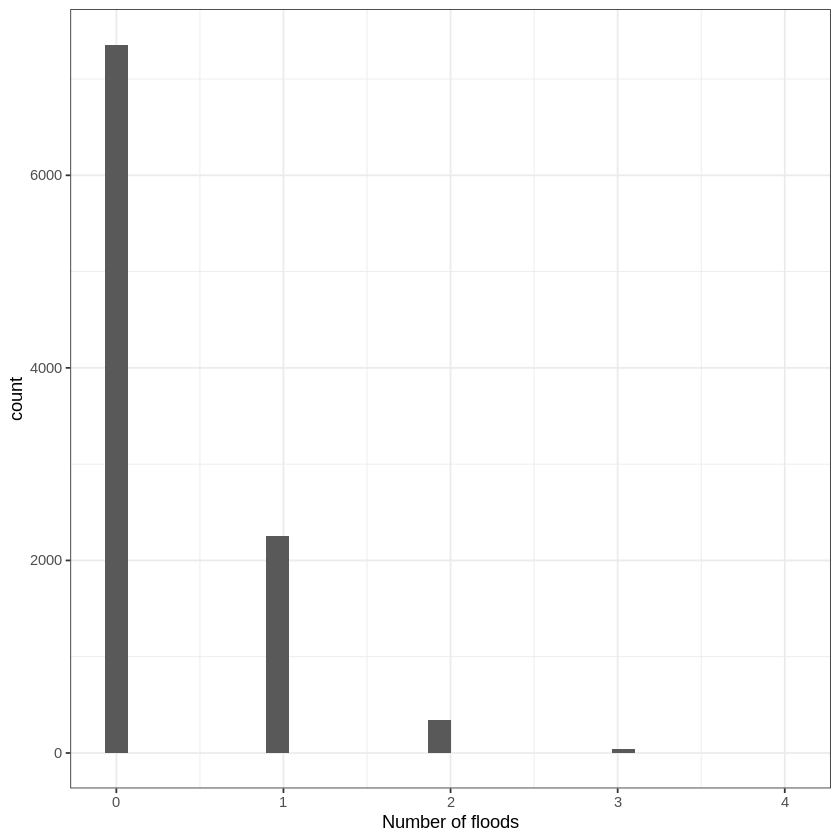

In [ ]:
# Your answer here!

# START
ggplot(data = flood_sim, aes(x=n_floods)) +
  geom_histogram() +
  scale_x_continuous('Number of floods') +
  theme_bw()
# END

**d. In what proportion of simulation runs was there at least one flood in 30 years?**

In [ ]:
# Your answer here!

# START
mean(flood_sim$n_floods >= 1)
# END

[1] 0.2642

**e. Comment on your histogram. Do your results support Professor Bledsoe’s calculation and your own calculation in 1b above?**

Your answer here!

### START

The histogram shows that most of the time there are no 100-year floods in a 30-year period, but sometimes there are 1, 2, or more floods. In the simulation, 26% of runs yielded at least one flood, consistent with our analytic calculation above.

### END